# ***Import the Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import stats
from patsy import dmatrices

# ***Step 1: `Load the data`***

In [2]:
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
data.shape

(6366, 9)

#### **Check how many `rows` and `columns` in the data**
- **`No of Rows`    :  6366**
- **`No of Columns` :  9**

# ***Step2: `Data Description` :***
- ***A story of what data is all about and the features present in the data***

### **Problem statement**
- According to the survey conducted by the Redbook maegazine in 1974 on womens, in which married women were asked about their participation in extramarital affairs.Predict the in which situation the woman interest in extramartial relationship.

    ### **`Data Description:`**

   - **rate_marriage :** Woman's rating of her marriage 
      - `1` : very poor
      - `2` : poor
      - `3` : good
      - `4` : very good
      - `5` : excellent)

   - **age :** Woman's age

   - **yrs_married :** No. of years married

   - **children :** No. of children

   - **religious :** woman's rating of how religious 
     - `1` : not religious
     - `2` : religious
     - `3` : very religious
     - `4` : strongly religious

   - **educ :** Level of education 
     - `9`  : grade school
     - `12` : high school
     - `14` : some college
     - `16` : college graduate 
     - `17` : some graduate school
     - `20` : advanced degree

   - **occupation :** Woman's occupation 
     - `1` : student 
     - `2` : farming/semi-skilled/unskilled
     - `3` : white collar
     - `4` : teacher/nurse/writer/technician/skilled
     - `5` : managerial/business
     - `6` : professional with advanced degree

   - **occupation_husb :** Husband's occupation
     - `1` : student 
     - `2` : farming/semi-skilled/unskilled
     - `3` : white collar
     - `4` : teacher/nurse/writer/technician/skilled
     - `5` : managerial/business
     - `6` : professional with advanced degree- 

   - **affairs :** Time spent in extra-marital affairs

**we change column `affairs`, into `0's` and `1's`** 
- ***where,*** 
  - `1` : **Woman having affairs**
  - `0` : **Woman not having affairs**



In [4]:
data['affairs'] = (data['affairs'] > 0).astype(int)

In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


# ***Step3: `Performing both Statistical and Graphical Data Analysis`***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


In [7]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [8]:
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

- **No missing value present in dataset**

In [9]:
data.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,0.017637
affairs,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,1.000000


- **Display the correlation with the heatmap**

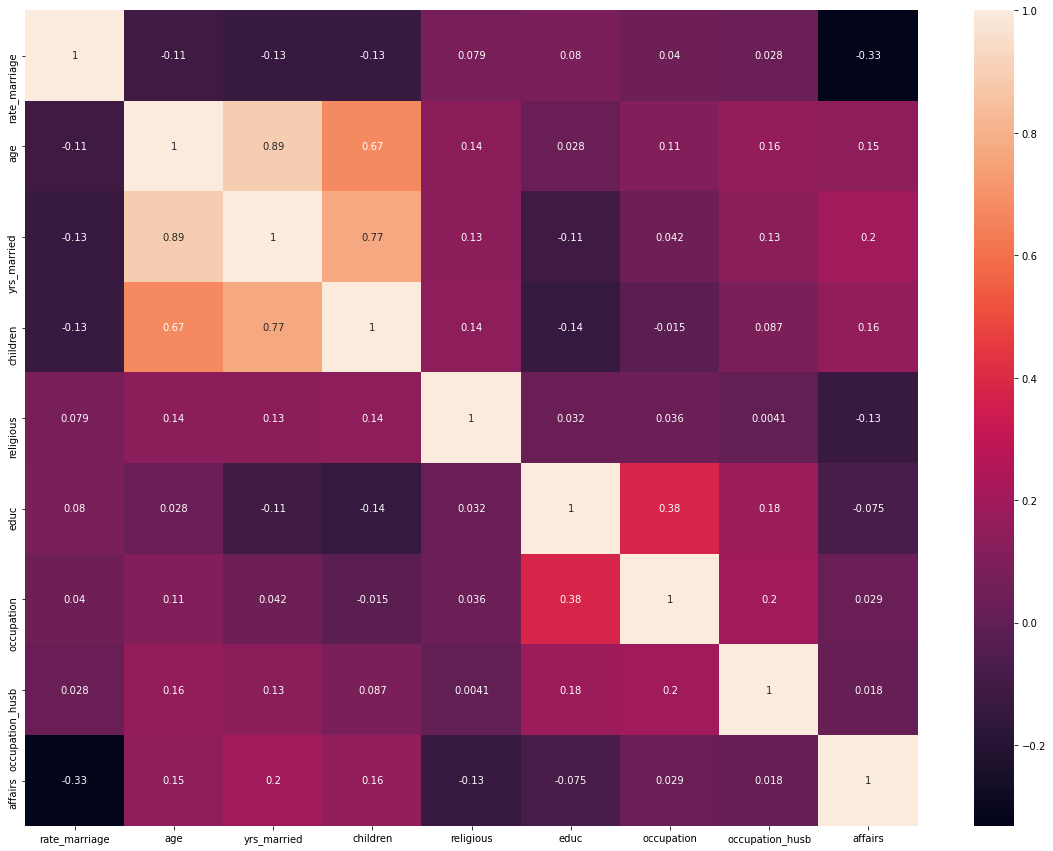

In [10]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

- **let's see how data is distributed for every column**

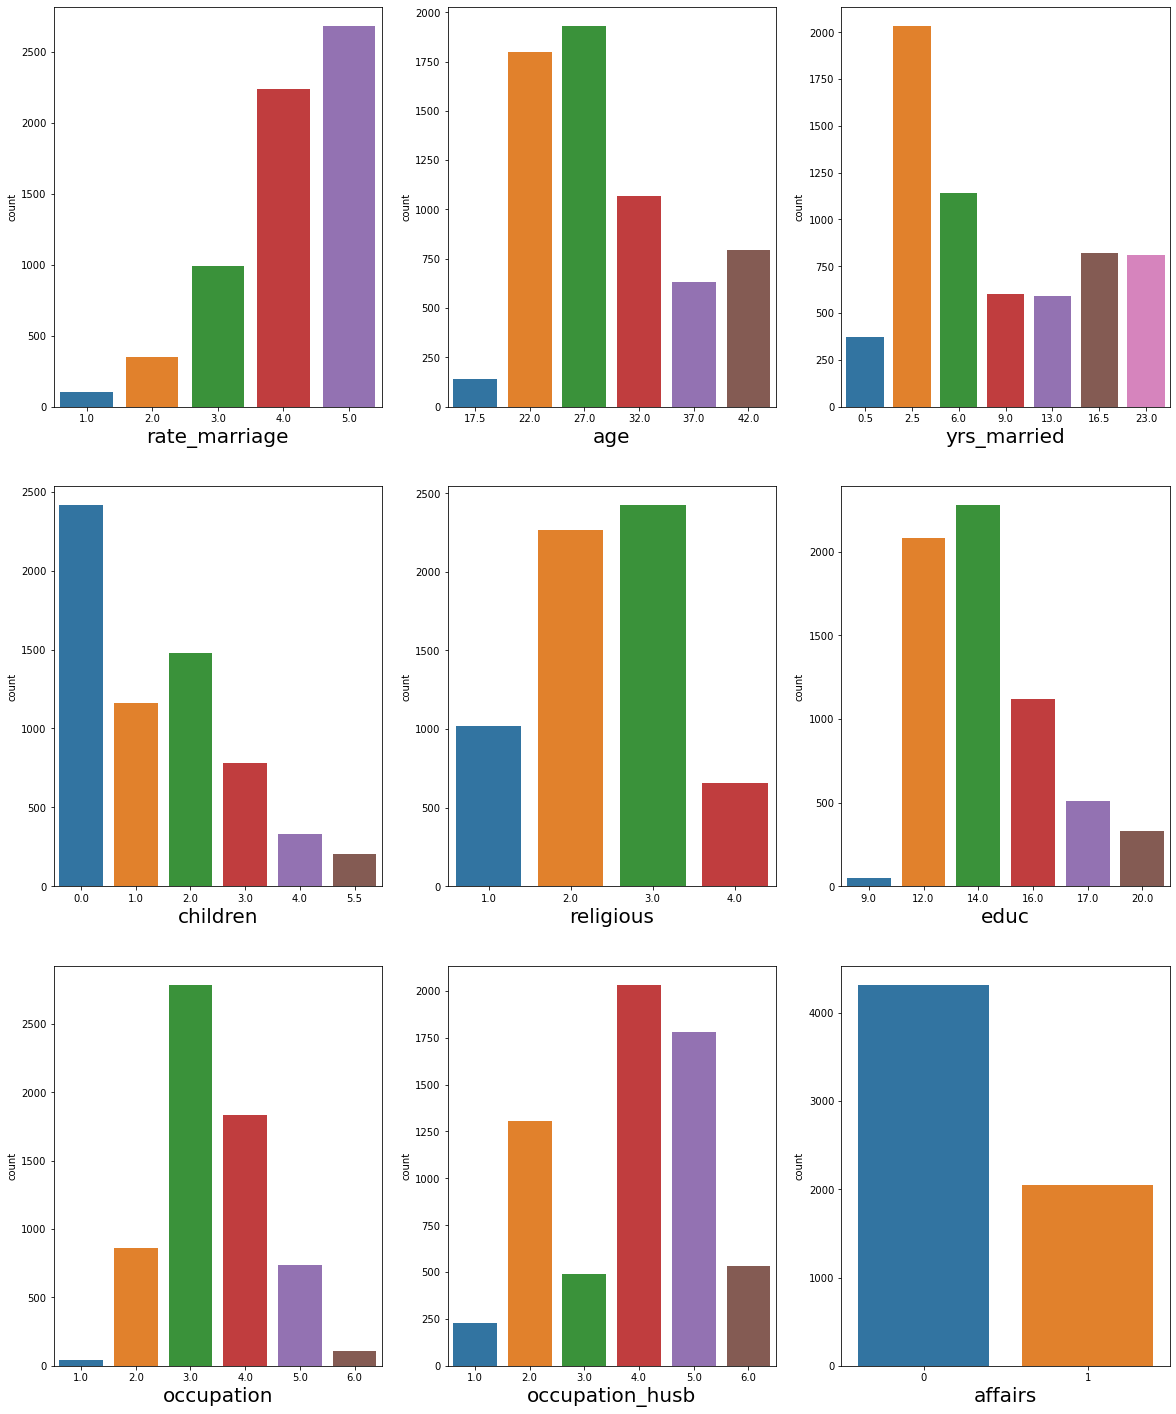

In [11]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotno = 1

for col in data:
    if plotno <= 9:  # as there are 9 columns in the dataset
        ax = plt.subplot(3, 3, plotno)
        sns.countplot(data[col])
        plt.xlabel(col, fontsize = 20)
    plotno += 1
plt.show()

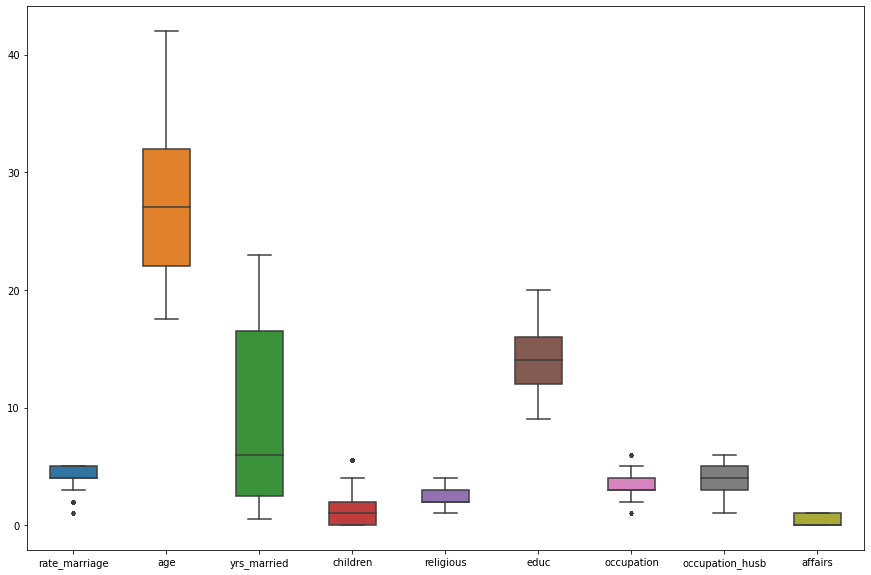

In [12]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = data, width= 0.5,ax=ax,  fliersize = 3)
plt.show()

- **There are outliers present in some columns. Let's deal with them.** 

In [13]:
q = data['children'].quantile(0.99)
# we are removing the top 1% data from the childern column
data_cleaned = data[data['children'] < q]

q = data['occupation'].quantile(0.99)
# we are removing the top 1% data from the occupation column
data_cleaned = data[data['occupation'] < q]


In [14]:
data_cleaned.shape

(6257, 9)

- **Resetting the index**

In [15]:
data_cleaned.reset_index(inplace=True)
data_cleaned.drop(columns=['index'],inplace=True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### **Let's see how data is distributed for every column**

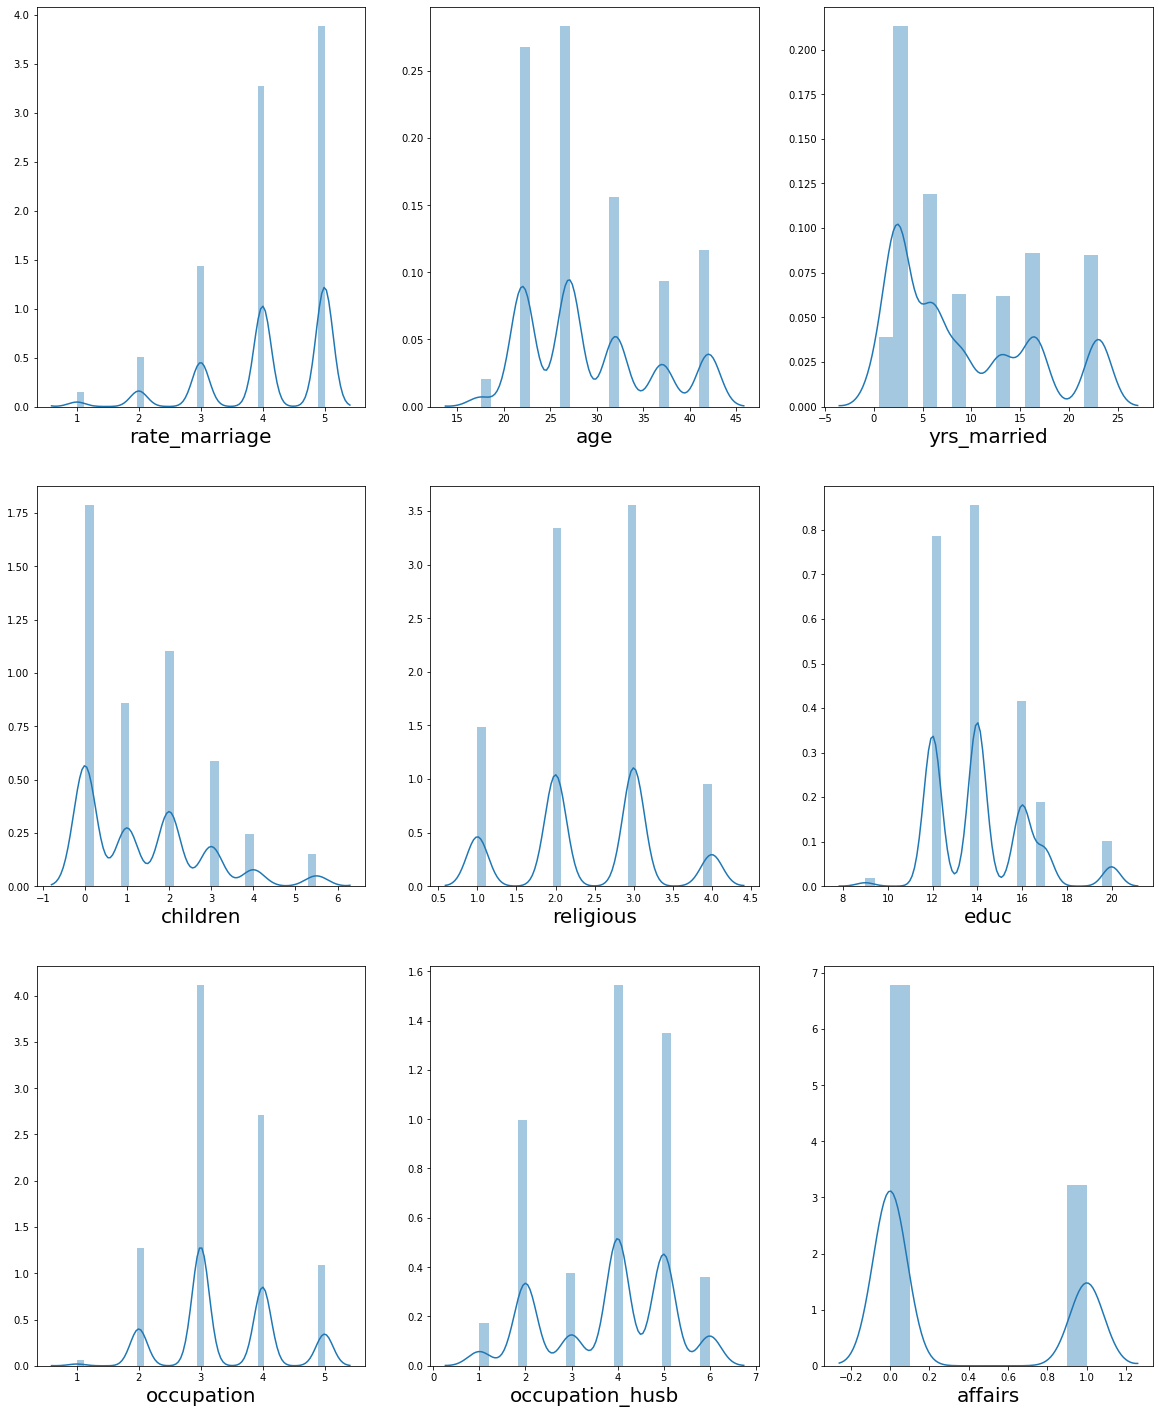

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for col in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

### **Check the relationships of each variables with target data**

In [17]:
def relation_plot(data, col):
    ax = pd.crosstab(data[col], data['affairs'])
    ax.div(ax.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (9,6))
    plt.title(col.capitalize() + " vs Affairs", fontsize = 18)
    plt.show()

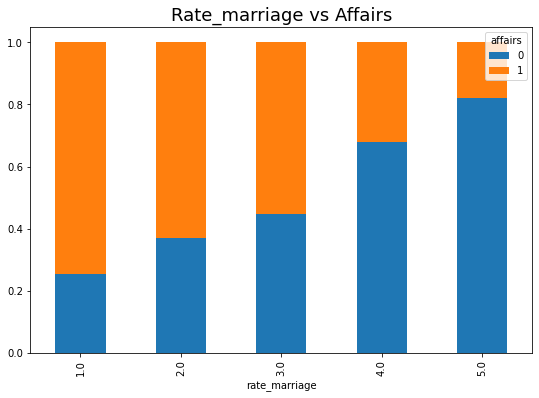

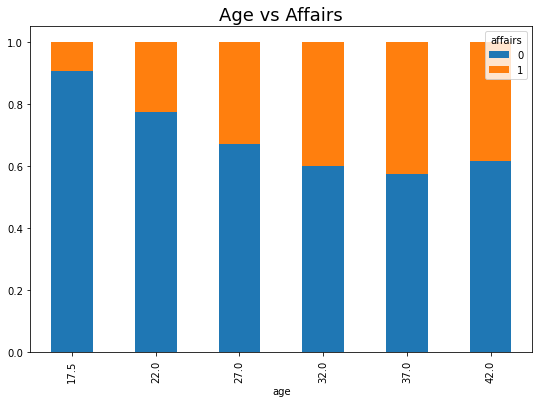

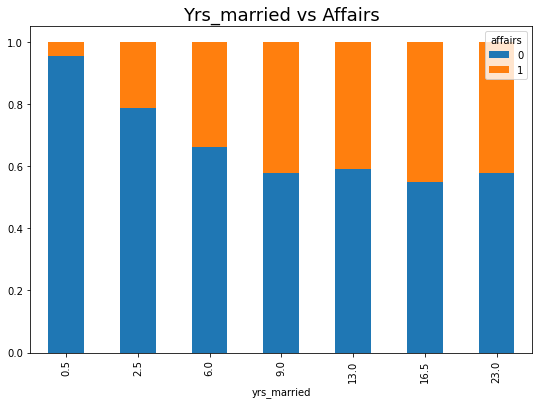

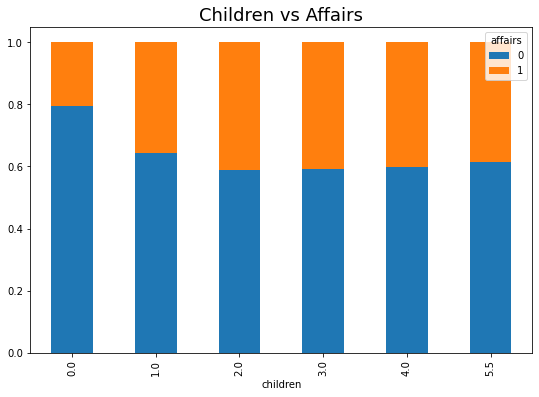

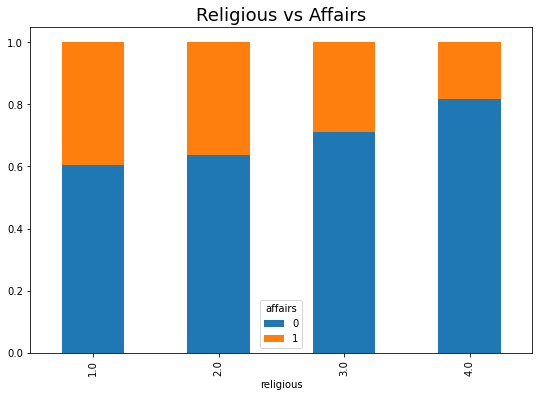

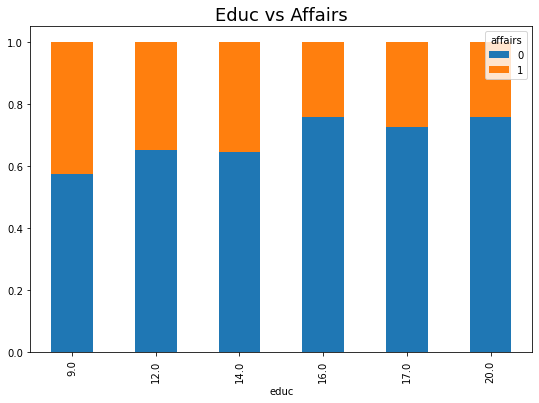

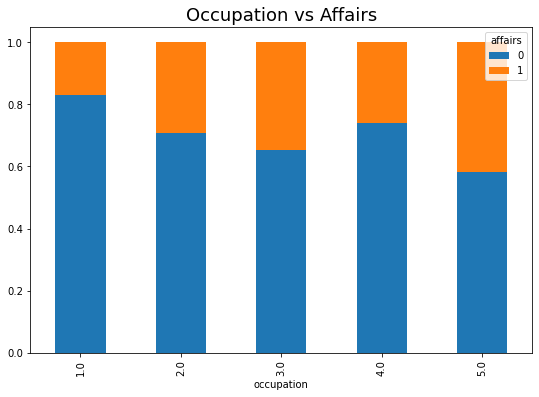

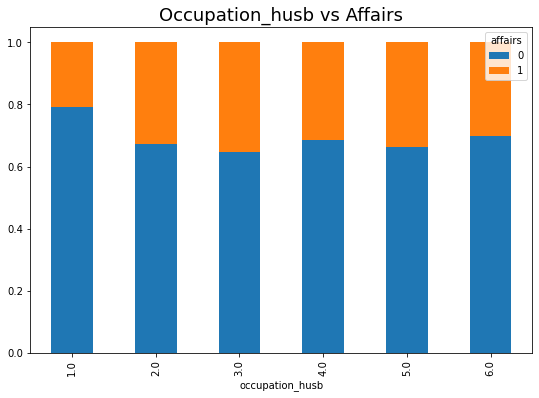

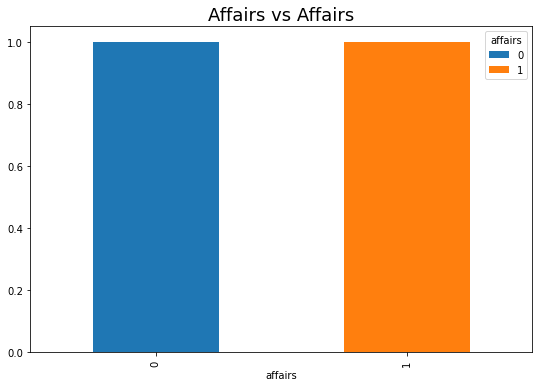

In [18]:
for col in data_cleaned.columns:
    relation_plot(data_cleaned, col)

- **Let's plot Some Categorical Variables**

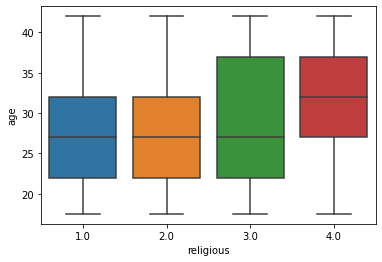

In [19]:
sns.boxplot(data_cleaned.religious, data_cleaned.age)
plt.show()

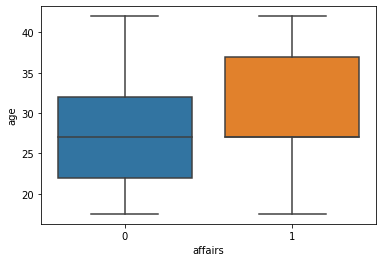

In [20]:
sns.boxplot(data_cleaned.affairs, data_cleaned.age)
plt.show()

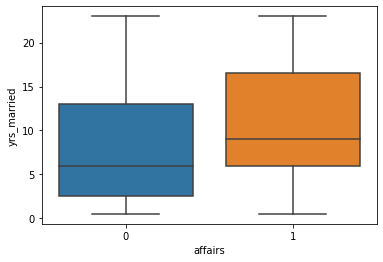

In [21]:
sns.boxplot(data_cleaned.affairs, data_cleaned.yrs_married)
plt.show()

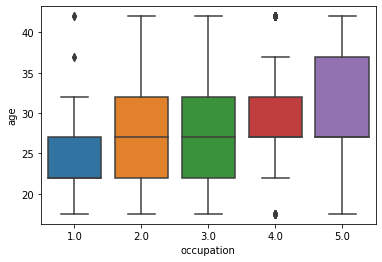

In [22]:
sns.boxplot(data_cleaned.occupation, data_cleaned.age)
plt.show()

### **Let's see data is balanced or not**

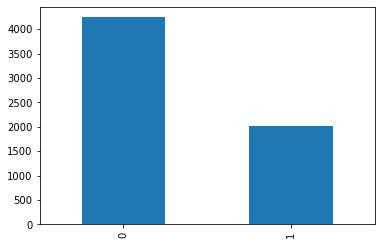

In [23]:
data_cleaned.affairs.value_counts().plot.bar()
plt.show()

## **Handling Imbalanced Data using `Over-Sampling`**

- `1` : **Woman having affairs**
- `0` : **Woman is not having affairs**
  - Here we can see that dependent variable have binary categories `1` and `0` but as we can see **`0` have more data than `1`** so it is a `imbalanced dataset`
- we need to balanced it by using **Over-Sampling**
  - **Over-Sampling** add data to categorie '1'
  - because category `1` have less no. of data then `0`
  - it will add data where `affirs == '1'` 
    - Ex: 
      - `0` = **4244** data 
      - `1` = **2013** data
      - it will add 2231 data in category `1` and equal it to category `0` `(4244 - 2013 = 2231 )` 
      - so now, 
        - `0` **(4244)** data == `1` **(4244)** data 
        - now category '1' have 4244 data which is smilar to category '0'
        - total no. of data 
           - 4244 + 4244 = 8488
- now we have balanced data

In [24]:
data_cleaned.affairs.value_counts()

0    4244
1    2013
Name: affairs, dtype: int64

**we can saparate `no_affair`(0) and `affair`(1) data and create new datasets**


In [25]:
no_affair = data_cleaned[data_cleaned['affairs'] == 0]
affair = data_cleaned[data_cleaned['affairs'] == 1]

In [26]:
no_affair.shape, affair.shape

((4244, 9), (2013, 9))

### **Seaparating `Dependent(Y)` and `Independent(X)` variables**

In [27]:
y = data_cleaned['affairs']
X = data_cleaned.drop(columns=['affairs'])

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
os = RandomOverSampler(random_state = 42)
X_im, y_im = os.fit_sample(X,y)

In [30]:
from collections import Counter

#### **we can see now data is `balanced`**

In [31]:
print("Imbalanced Data :   ",Counter(y))
print("Balanced Data   :   ",Counter(y_im))

Imbalanced Data :    Counter({0: 4244, 1: 2013})
Balanced Data   :    Counter({1: 4244, 0: 4244})


# ***Step 4: `Data Transformation and derivation of new attributes if necessary`***

- **Dataset have some categorical features let's handle that**
  - as wee can see the data Description `rate_marriage, occupation_husb, occupation, religious` these features are categorical type

In [32]:
cat_var = ['rate_marriage','occupation_husb','occupation','religious']

In [33]:
for col in cat_var:
    print("Column Name: ",col)
    print(X_im[col].value_counts())
    print("----------------------------------")

Column Name:  rate_marriage
5.0    3172
4.0    3000
3.0    1559
2.0     577
1.0     180
Name: rate_marriage, dtype: int64
----------------------------------
Column Name:  occupation_husb
4.0    2732
5.0    2379
2.0    1771
3.0     687
6.0     644
1.0     275
Name: occupation_husb, dtype: int64
----------------------------------
Column Name:  occupation
3.0    3834
4.0    2396
2.0    1126
5.0    1089
1.0      43
Name: occupation, dtype: int64
----------------------------------
Column Name:  religious
2.0    3155
3.0    3115
1.0    1443
4.0     775
Name: religious, dtype: int64
----------------------------------


In [34]:
X_im.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
dtype: object

- **change the data type of categorical features `float` into `int`**

In [35]:
for col in cat_var:
    X_im[col] = X_im[col].astype('int')

In [36]:
X_im.dtypes

rate_marriage        int32
age                float64
yrs_married        float64
children           float64
religious            int32
educ               float64
occupation           int32
occupation_husb      int32
dtype: object

## **Creating Dummies for categorical features** 
### **`OneHotEncoder`** 

   - Encode **categorical features** as a `one-hot numeric array`.
   - The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a `binary column for each category` and `returns a sparse matrix` or dense array (depending on the sparse parameter)

- By default, the encoder derives the categories based on the unique values in each feature. Alternatively, you can also specify the categories manually.

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
np.isnan(X_im.any()).sum()

0

In [39]:
X_final = X_im.copy()

In [40]:
def make_one_hot_encode(X_final, col):
    ohe = OneHotEncoder()
    ohe_data = ohe.fit_transform(X_final[[col]]).toarray()
    ohe_df = pd.DataFrame(ohe_data, columns = [col + i for i in ohe.get_feature_names()]).astype('uint8')
    X_final = pd.concat([X_final, ohe_df], axis = 1)
    X_final.drop(columns = [col], inplace = True)
    return X_final

In [41]:
for col in X_im.select_dtypes('int32').columns:   
    X_final = make_one_hot_encode(X_final, col)

In [42]:
X_final.head()

,age,yrs_married,children,educ,rate_marriagex0_1,rate_marriagex0_2,rate_marriagex0_3,rate_marriagex0_4,rate_marriagex0_5,religiousx0_1,...,occupationx0_2,occupationx0_3,occupationx0_4,occupationx0_5,occupation_husbx0_1,occupation_husbx0_2,occupation_husbx0_3,occupation_husbx0_4,occupation_husbx0_5,occupation_husbx0_6
0,32.0,9.0,3.0,17.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,27.0,13.0,3.0,14.0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,22.0,2.5,0.0,16.0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
3,37.0,16.5,4.0,16.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,27.0,9.0,1.0,14.0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [43]:
X_final.shape

(8488, 24)

# ***Step 5: `Data Standardization and Normalization`***

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
def make_min_max_scale(X_final,col):
    mms = MinMaxScaler()
    X_final[col] = mms.fit_transform(X_final[[col]])
    return X_final

In [46]:
scale_var = ['age','yrs_married','children','educ']
for col in scale_var:
    X_final = make_min_max_scale(X_final, col)

In [47]:
X_final.describe()

,age,yrs_married,children,educ,rate_marriagex0_1,rate_marriagex0_2,rate_marriagex0_3,rate_marriagex0_4,rate_marriagex0_5,religiousx0_1,...,occupationx0_2,occupationx0_3,occupationx0_4,occupationx0_5,occupation_husbx0_1,occupation_husbx0_2,occupation_husbx0_3,occupation_husbx0_4,occupation_husbx0_5,occupation_husbx0_6
count,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,...,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000,8488.000000
mean,0.488423,0.403699,0.270317,0.464003,0.021206,0.067978,0.183671,0.353440,0.373704,0.170005,...,0.132658,0.451697,0.282281,0.128299,0.032399,0.208648,0.080938,0.321866,0.280278,0.075872
std,0.278584,0.324802,0.261298,0.189751,0.144080,0.251724,0.387239,0.478066,0.483815,0.375659,...,0.339225,0.497691,0.450136,0.334442,0.177067,0.406366,0.272756,0.467219,0.449161,0.264809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.183673,0.088889,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387755,0.244444,0.181818,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.591837,0.711111,0.363636,0.636364,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Step 6: `Creating of Train and Test data sets using optimum parameters`***

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y_im.shape, X_final.shape

((8488,), (8488, 24))

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_final, y_im, test_size = 0.2, random_state = 42)

# ***Step 7: `Model Training using ML Algorithm tested above`***

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logit = LogisticRegression()

logit.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred_test = logit.predict(x_test)
y_pred_train = logit.predict(x_train)

# ***Step 8: `Calculation of Model Accuracy:`***
- **Both Training and test Accuracies**

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [55]:
print("Test Accuracy  : ",round(accuracy_score(y_test, y_pred_test), 6))
print("Train Accuracy : ",round(accuracy_score(y_train, y_pred_train), 5))

Test Accuracy  :  0.6702
Train Accuracy :  0.6866


**As we can see test and train accuracy is almost same it's mean model is neither `Over-fitting` nor `Under-fitting`**

### ***Confusion Matrix***
- `True Positive(TP)`: 
   - A result that was predicted as positive by the classification model and also is positive

- `True Negative(TN)`: 
   - A result that was predicted as negative by the classification model and also is negative

- `False Positive(FP)`: 
   - A result that was predicted as positive by the classification model but actually is negative

- `False Negative(FN)`: 
   - A result that was predicted as negative by the classification model but actually is positive.

In [56]:
conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[594, 230],
       [330, 544]], dtype=int64)

In [57]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

- **Breaking down the formula for** 
  - Accuracy 
  - Precision
  - Recall

In [58]:
Accuracy = (TP + TN) / (TP + FP + FN + TN)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)

print("Recall     : ",round(Recall, 4))
print("Precision  : ",round(Precision, 4))
print("Accuracy   : ",round(Accuracy, 4))

Recall     :  0.6429
Precision  :  0.7209
Accuracy   :  0.6702


### **F1 Score**

In [59]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6796338672768879

### **Area Under Curve**

In [60]:
auc = roc_auc_score(y_test, y_pred_test)
auc

0.6716497078491923

In [61]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

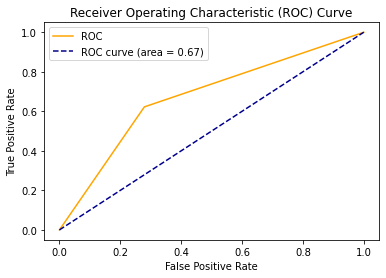

In [62]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The `blue` dotted line represents the scenario when the **true positive rate equals the false positive rate**.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in `blue` is the best point as it **predicts all the values correctly and keeps the False positive as a minimum**.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* ***The ROC curve answers our question of which threshold to choose.***

- **What is the significance of Roc curve and AUC?**
  - In real life, we create various models using different algorithms that we can use for classification purpose. We use AUC to determine which model is the best one to use for a given dataset. Suppose we have created Logistic regression, SVM as well as a clustering model for classification purpose. We will calculate AUC for all the models seperately. The model with highest AUC value will be the best model to use.

## **CV (Cross Validation)**
- `Cross-validation` sometimes called **rotation estimation** or **out-of-sample testing**, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.
- The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, **in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset** (i.e., an unknown dataset, for instance from a real problem).

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logit, X_final, y_im, scoring='accuracy', cv=10)
scores

array([0.67608952, 0.67608952, 0.69022379, 0.6819788 , 0.68315665,
       0.7008245 , 0.65606596, 0.64899882, 0.69575472, 0.68160377])

In [64]:
scores.mean()

0.6790786052403492

# ***Step 9: `Saving the created Model File`***

In [65]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(logit,f)